In [189]:
# Colby Bailey
# data science summer 2023
# UTSA Student ID: nib667

In [190]:
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import datetime

In [191]:
%matplotlib inline

In [192]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [193]:
# INSTRUCTOR CODE
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [194]:
# INSTRUCTOR CODE
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [195]:
# INSTRUCTOR CODE
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [196]:
# INSTRUCTOR CODE
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [197]:
# INSTRUCTOR CODE
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [198]:
# TASK 1
zip_path = 'weather.zip'
with zipfile.ZipFile( zip_path, 'r' ) as zip_ref:
    zip_ref.extractall( )

In [199]:
ls -l weather

total 47888
-rw-r--r--  1 bagoferasers  staff  1711530 Jun 27 16:02 RSM00030710.dly
-rw-r--r--  1 bagoferasers  staff  4165020 Jun 27 16:02 USW00014922.dly
-rw-r--r--  1 bagoferasers  staff  3692790 Jun 27 16:02 USW00022536.dly
-rw-r--r--  1 bagoferasers  staff  3502710 Jun 27 16:02 USW00023188.dly
-rw-r--r--@ 1 bagoferasers  staff    44303 Jun 27 16:02 project2.ipynb
-rw-r--r--  1 bagoferasers  staff    24088 Jun 27 16:02 readme.txt
-rw-r--r--  1 bagoferasers  staff  8523546 Jun 27 16:02 stations.txt
-rw-r--r--  1 bagoferasers  staff      576 Jun 27 16:02 weather.README


In [200]:
# TASK 2
filename = 'weather/USW00014922.dly'
obs = 'TMAX'
tmax_series = getobs(filename,obs)
minneapolis = parsefile(filename)
minneapolis

array([(1938, 4, 'TMAX', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, 106,   189,   172,   217,   256,   194,   117,   133,   228,   217,   172,   144,    89,   144,  94,   111,   156,   267,   256,   156,   144,   222, -9999),
       (1938, 4, 'TMIN', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -17,    11,    61,    28,    78,    78,    72,   106,   106,    72,    11,    -6,    17,    -6,  39,    56,    44,   117,   156,    39,    17,    44, -9999),
       (1938, 4, 'PRCP', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,   0,     0,     0,     0,     0,   267,    64,   193,    58,     0,     0,     3,    25,     0, 119,    10,     0,     0,    36,    56,     0,     0, -9999),
       ...,
       (2015, 9, 'WT01',     1,     1,     1,     1,     1,     1, -9999,     1,   1,     1, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999, -9999, -9999, -9999,     1,   1,     1,     1,     1, -9999, -9999, -9999, -9999, -9999),
       (2015, 9, 'WT03', -9999, 

In [201]:
unroll(minneapolis[0])

array([('1938-04-01', -999.9), ('1938-04-02', -999.9),
       ('1938-04-03', -999.9), ('1938-04-04', -999.9),
       ('1938-04-05', -999.9), ('1938-04-06', -999.9),
       ('1938-04-07', -999.9), ('1938-04-08', -999.9),
       ('1938-04-09',   10.6), ('1938-04-10',   18.9),
       ('1938-04-11',   17.2), ('1938-04-12',   21.7),
       ('1938-04-13',   25.6), ('1938-04-14',   19.4),
       ('1938-04-15',   11.7), ('1938-04-16',   13.3),
       ('1938-04-17',   22.8), ('1938-04-18',   21.7),
       ('1938-04-19',   17.2), ('1938-04-20',   14.4),
       ('1938-04-21',    8.9), ('1938-04-22',   14.4),
       ('1938-04-23',    9.4), ('1938-04-24',   11.1),
       ('1938-04-25',   15.6), ('1938-04-26',   26.7),
       ('1938-04-27',   25.6), ('1938-04-28',   15.6),
       ('1938-04-29',   14.4), ('1938-04-30',   22.2)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [202]:
minneapolis_tmax = getobs(filename, obs)

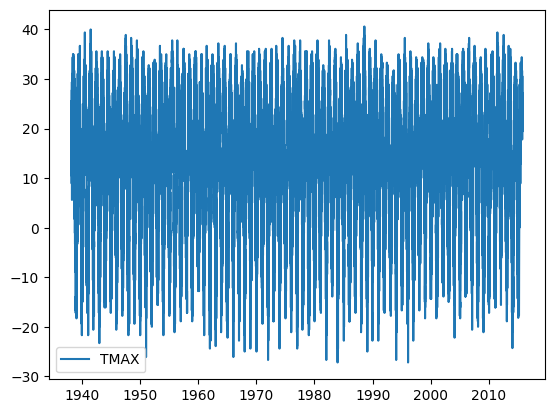

In [203]:
plt.plot(minneapolis_tmax['date'],minneapolis_tmax['value'], label="TMAX")
plt.legend(loc="best")

In [204]:
fillnans(minneapolis_tmax)

In [205]:
np.mean(minneapolis_tmax['value'])

12.74308121666019

In [206]:
year_range = range(1940,2015)
tmax_filled = selectyear(minneapolis_tmax,year_range)

ValueError: Error parsing datetime string "range(1940, 2015)" at position 0